<a href="https://colab.research.google.com/github/sftSalman/tensorflowBasic/blob/main/CatsAndDog_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2022-07-28 14:09:13--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.213.128, 173.194.214.128, 173.194.215.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.213.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   224MB/s    in 0.3s    

2022-07-28 14:09:14 (224 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
import zipfile

In [4]:
local_zip = '/content/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall()

In [5]:
import os 

In [6]:
base_dir = '/content/cats_and_dogs_filtered'

In [7]:
print(os.listdir(base_dir))

['vectorize.py', 'train', 'validation']


In [8]:
print(os.listdir(f'{base_dir}/validation'))

['cats', 'dogs']


In [11]:
print(len(os.listdir(f'{base_dir}/train/cats')))

1000


In [12]:
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')

In [13]:
train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')

In [16]:
validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')

In [20]:
train_cats_name = os.listdir(train_cats_dir)
train_dogs_name = os.listdir(train_dogs_dir)

In [21]:

print(train_cats_name[:10])
print(train_dogs_name[:10])

['cat.20.jpg', 'cat.943.jpg', 'cat.496.jpg', 'cat.116.jpg', 'cat.342.jpg', 'cat.178.jpg', 'cat.566.jpg', 'cat.724.jpg', 'cat.584.jpg', 'cat.169.jpg']
['dog.267.jpg', 'dog.750.jpg', 'dog.97.jpg', 'dog.919.jpg', 'dog.620.jpg', 'dog.115.jpg', 'dog.855.jpg', 'dog.684.jpg', 'dog.399.jpg', 'dog.253.jpg']


In [22]:
len(train_cats_name)

1000

In [23]:
len(train_dogs_name)

1000

In [27]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array


Sample cats image:


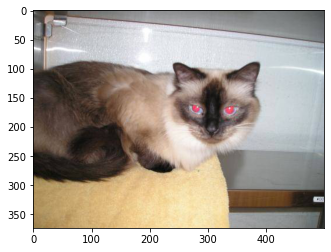


Sample dogs image:


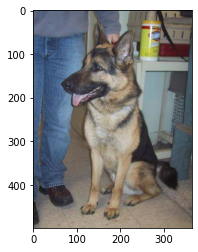

In [29]:
print("Sample cats image:")
plt.imshow(load_img(f"{os.path.join(train_cats_dir, os.listdir(train_cats_dir)[0])}"))
plt.show()

print("\nSample dogs image:")
plt.imshow(load_img(f"{os.path.join(train_dogs_dir, os.listdir(train_dogs_dir)[0])}"))
plt.show()

In [ ]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images